# Implementing Clustering using KMeans Algorithm to identify potential customers for a marketing campaign

### Here we have data about different customers who have spend a substantial amount of money over a period of time to purchase a set of products which provided them a score rating from the company.

In [10]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams

In [11]:
# Importing the dataset and displaying it
knn = pd.read_csv('C:\\Users\\rishi\\Desktop\\Fall 2018\\Udemy\\Machine Learning\\KMeans\\K_Means\\\Mall_Customers.csv')
knn

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [12]:
rcParams['figure.figsize'] = 10, 10

In [13]:
# This will give us a good resolution for our visualization
%config InlineBackend.figure_format = 'retina' 

### Now, subsetting the columns that will be used to perform the clustering on such as The Annual income and the Spending score

In [14]:
X = dataset.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Now we are trying to assume the optimal number of cluster to be formed for our analysis since kmeans cannot find the optimal number of cluster by itself.
### For this we will take help of the elbow method as shown below: -

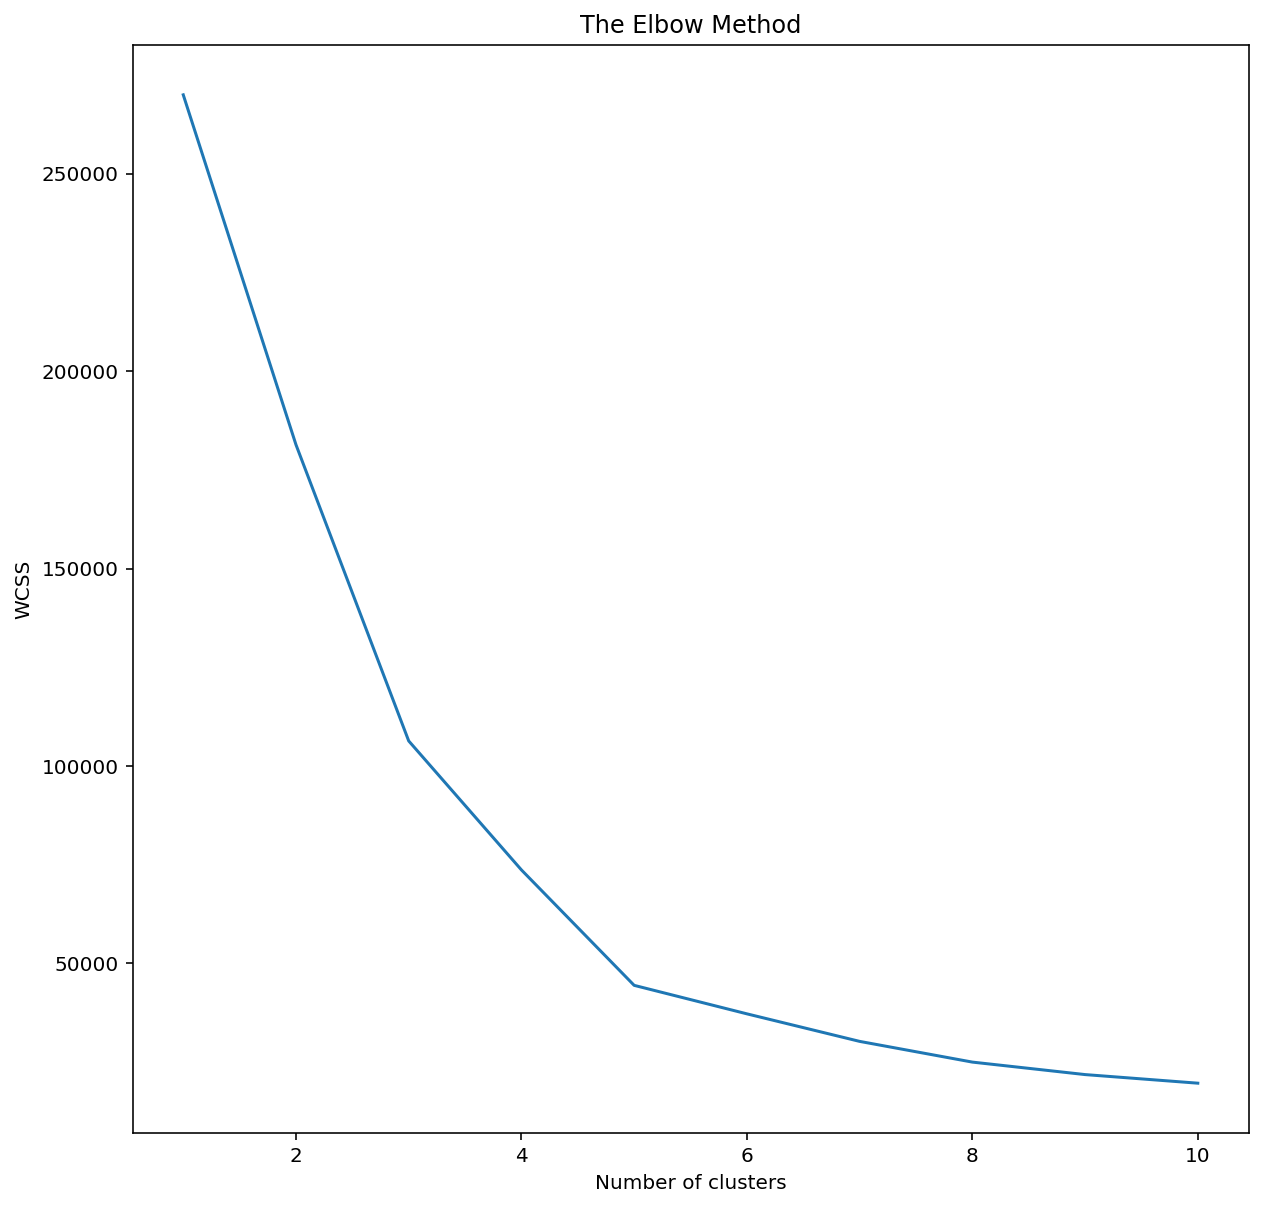

In [15]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### From the above graph we can clearly asuume that for our dataset the optimal number of clusters would be 5.

### This is so because, if you observe after 5 the decend in the graph has a very small slope which means that maximum number of datapoint making impact on our analysis will come with in 5 clusters.

#### Now let us use the Kmeans algorithm, and fit our subset of columns into the machine learning model

In [16]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## This is very important

### Now our model is able to predict the clusters based on the kmeans algorithm.
### And we are using "k-means++" algorithm in order to avoid the random initilization trap for select the centroid for our cluster.


#### Now this is our predicted set of clusters which ranges from 0 to 4 which means a total of 5 clusters.

In [17]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4])

### Now let us try and visualize our interpretation of our kmeans algorithm to analyze our customers

#### For this we are using scatter plot

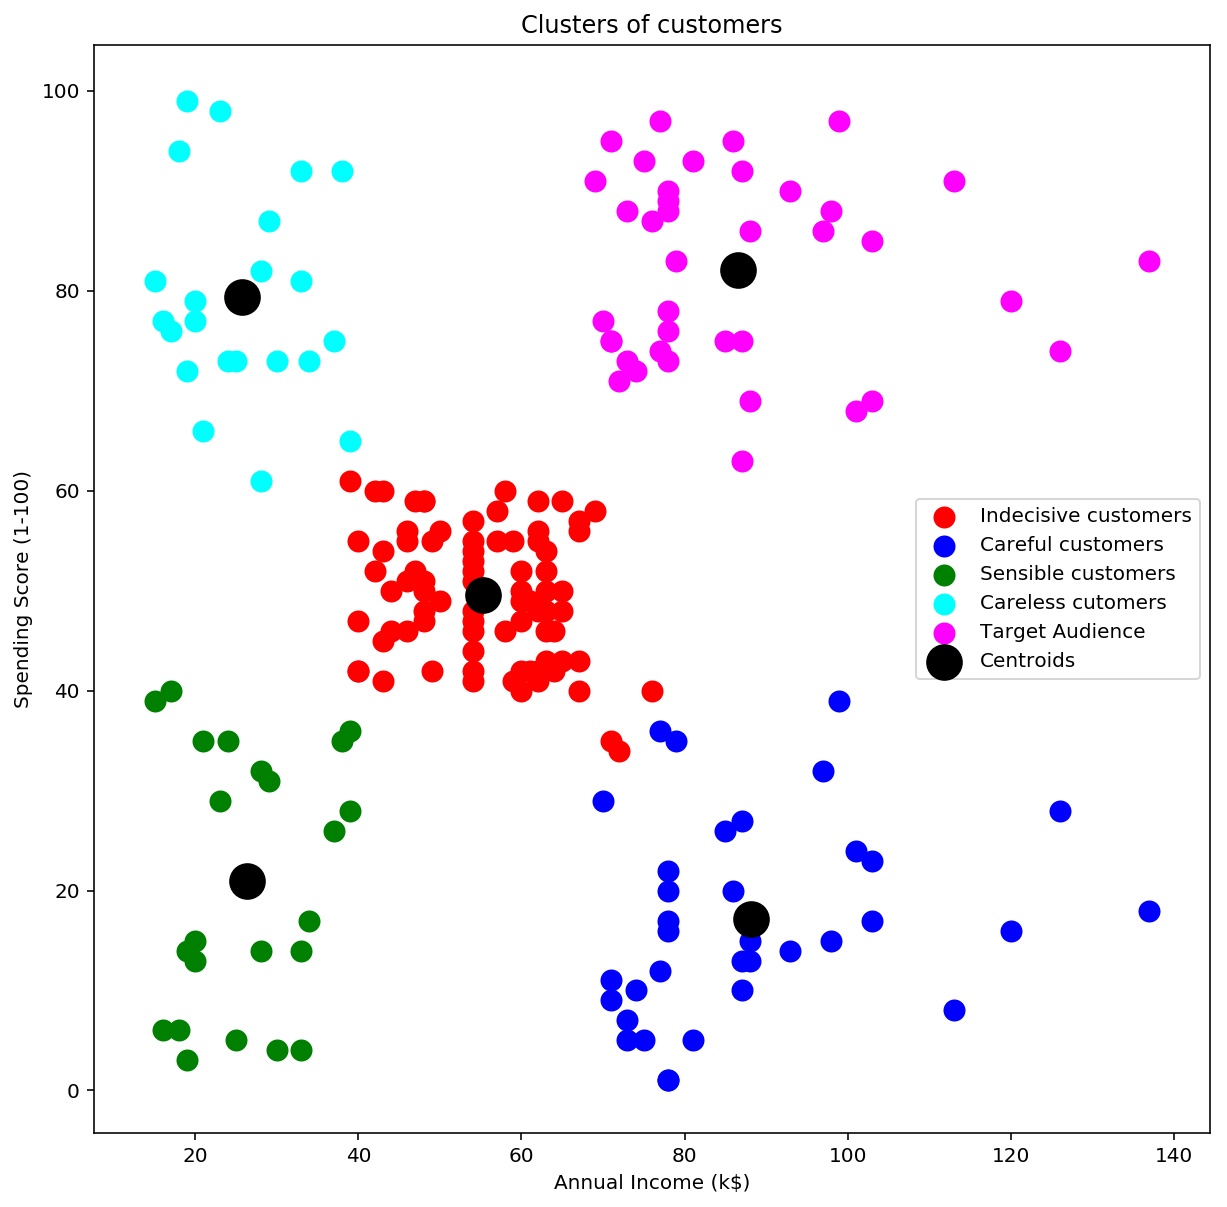

In [19]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Indecisive customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Careful customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Sensible customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless cutomers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Target Audience')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## From the above we are clearly see the 5 clusters which their centroids in black.

### Our inference is as follows : -

#### -> Customer who earn medium and spend medium ---> Indecisive customers (RED)
#### -> Customer who earn high and spend less ---> Careful customers (BLUE)
#### -> Customer who earn low and spend low ---> Sensible customers (GREEN)
#### -> Customer who earn low and spend low ---> Careless customers (CYAN)
#### -> Customer who earn high and spend high ---> Target Audience (MAGENTA) -> These are the customers for whom we need to
#### study their purchase behavior and perform further analysis to identify what kind of a trading  strategy we can implement for 
#### maximum returns.